In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display options
plt.style.use('seaborn-v0_8')
sns.set_palette('magma')


In [66]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [67]:
# Shape and info
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

# Describe data
df.describe(include='all').T


Rows: 1000, Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Poster_Link,1000,1000,https://m.media-amazon.com/images/M/MV5BMTY5OD...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series_Title,1000,999,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,1000,100,2014,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certificate,899,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,1000,140,100 min,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,1000,202,Drama,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,1000.0,NaN,NaN,NaN,7.9493,0.275491,7.6,7.7,7.9,8.1,9.3
Overview,1000,1000,A man in London tries to help a counter-espion...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,843.0,NaN,NaN,NaN,77.97153,12.376099,28.0,70.0,79.0,87.0,100.0
Director,1000,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Remove missing values
df.dropna(inplace=True)

# Convert columns
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Confirm cleaning
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


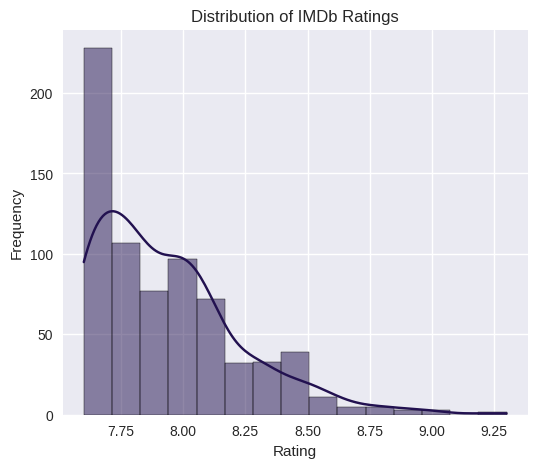

In [69]:
plt.figure(figsize=(6,5))
sns.histplot(df['IMDB_Rating'], kde=True, bins=15)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_IMDb_Ratings.png', bbox_inches='tight')
plt.show()


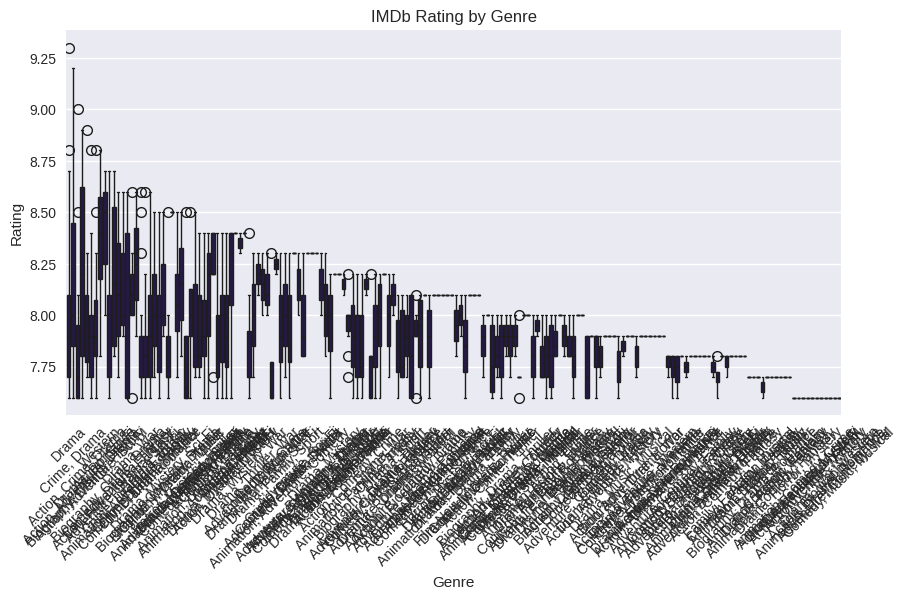

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Genre', y='IMDB_Rating')
plt.xticks(rotation=45)
plt.title('IMDb Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.savefig('IMDb_Rating_by_Genre.png', bbox_inches='tight')
plt.show()


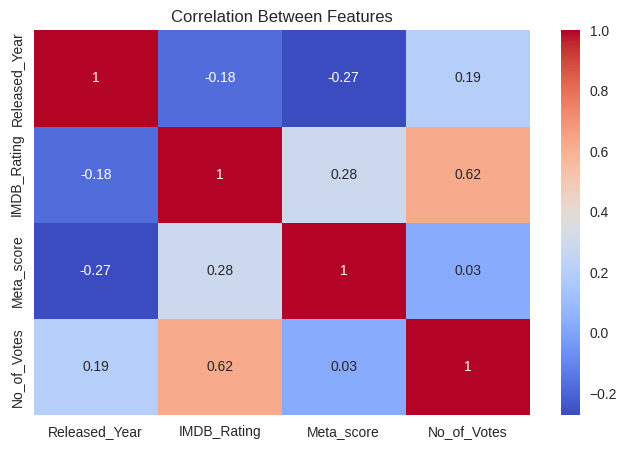

In [71]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.savefig('Correlation_Between_Features.png', bbox_inches='tight')
plt.show()


In [72]:
# Encode categorical columns
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Certificate'] = le.fit_transform(df['Certificate'])

# Define features and target
X = df[['Released_Year', 'Meta_score', 'No_of_Votes', 'Genre', 'Certificate']]
y = df['IMDB_Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with NaN values from training and testing sets
X_train.dropna(inplace=True)
y_train = y_train[X_train.index] # Align y_train with X_train after dropping rows
X_test.dropna(inplace=True)
y_test = y_test[X_test.index] # Align y_test with X_test after dropping rows

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
from xgboost import XGBRegressor


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

results = []

In [74]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_mean = np.mean(cv_scores)

    results.append([name, round(r2, 3), round(rmse, 3), round(cv_mean, 3)])

results_df = pd.DataFrame(results, columns=['Model', 'R² Score', 'RMSE', 'CV R²'])
print(results_df.sort_values(by='R² Score', ascending=False))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_b

               Model  R² Score   RMSE   CV R²
6  Gradient Boosting     0.559  0.192     NaN
0  Linear Regression     0.505  0.204     NaN
1   Ridge Regression     0.505  0.204     NaN
4      Random Forest     0.500  0.205 -15.942
2   Lasso Regression     0.473  0.210     NaN
7        Extra Trees     0.472  0.210 -15.837
5            XGBoost     0.424  0.220 -18.031
8                SVR     0.384  0.227     NaN
9                KNN     0.337  0.236     NaN
3      Decision Tree     0.035  0.285 -28.942


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py", 

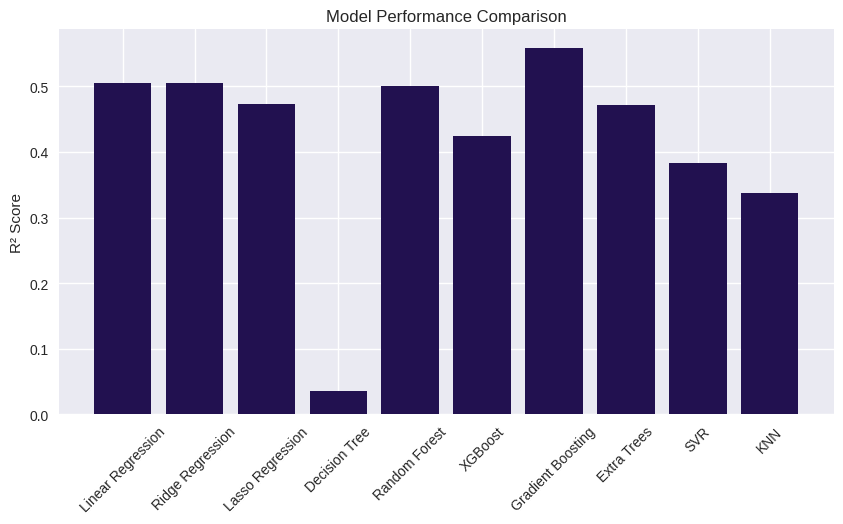

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['R² Score'])
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.savefig('Model_Performance_Comparison.png', bbox_inches='tight')
plt.show()


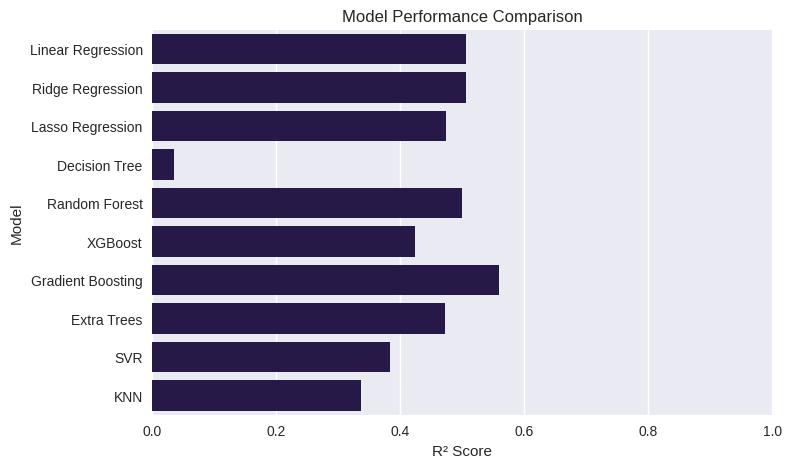

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='R² Score', y='Model')
plt.title('Model Performance Comparison')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.savefig('Model_Performance_Comparison_2.png', bbox_inches='tight')
plt.show()


In [77]:
best_model = results_df.loc[results_df['R² Score'].idxmax()]
print(f"🏆 Best Model: {best_model['Model']}")
print(f"R² Score: {best_model['R² Score']}")
print(f"RMSE: {best_model['RMSE']}")
print(f"CV R²: {best_model['CV R²']}")


🏆 Best Model: Gradient Boosting
R² Score: 0.559
RMSE: 0.192
CV R²: nan
